In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("New_Dataset_Salary_2024.csv")

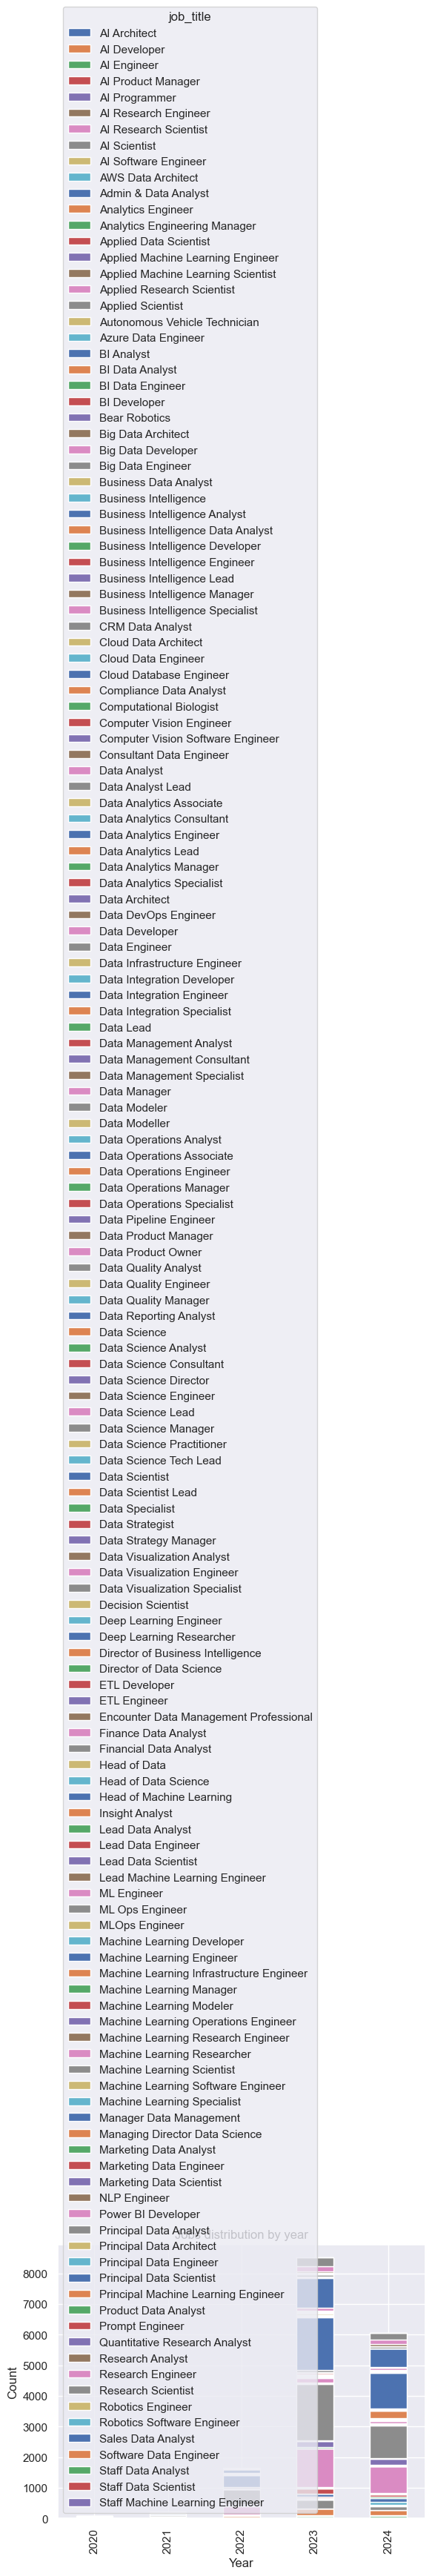

In [7]:
df_pivot = df.groupby(['work_year','job_title']).size().unstack(fill_value=0)
df_pivot.plot(kind='bar', stacked=True)
plt.title('Jobs distribution by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [10]:
top_jobs = df['job_title'].value_counts().nlargest(10).index
df_top = df[df['job_title'].isin(top_jobs)]

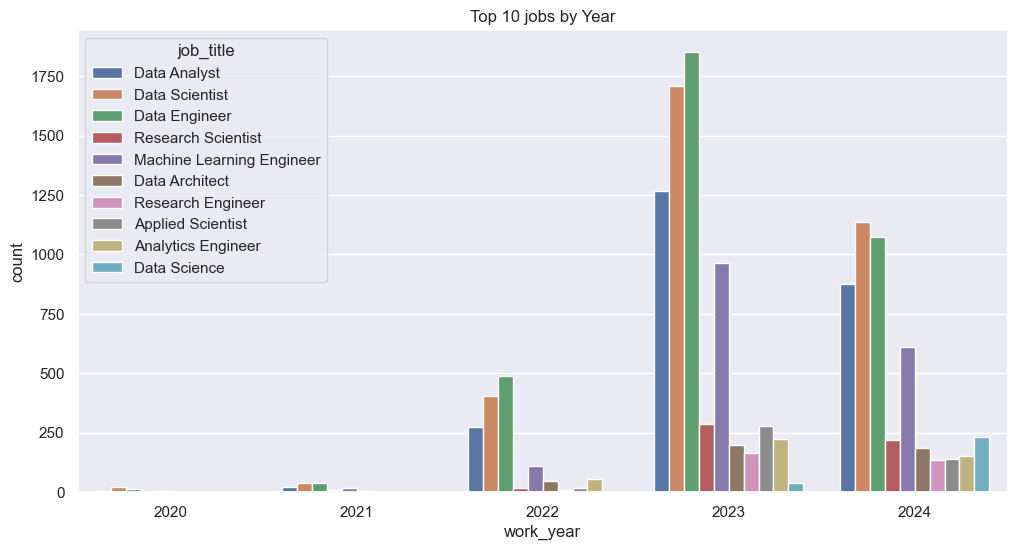

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='work_year',hue='job_title')
plt.title("Top 10 jobs by Year")
plt.show()

In [33]:
avg_salary_top_jobs = df_top.groupby('job_title')['salary_in_usd'].mean()
print(avg_salary_top_jobs)

job_title
Analytics Engineer           160215.255220
Applied Scientist            189984.117241
Data Analyst                 107921.134426
Data Architect               160717.043678
Data Engineer                146540.107390
Data Science                 162381.531365
Data Scientist               154133.839771
Machine Learning Engineer    188623.368328
Research Engineer            190177.977124
Research Scientist           192093.090395
Name: salary_in_usd, dtype: float64


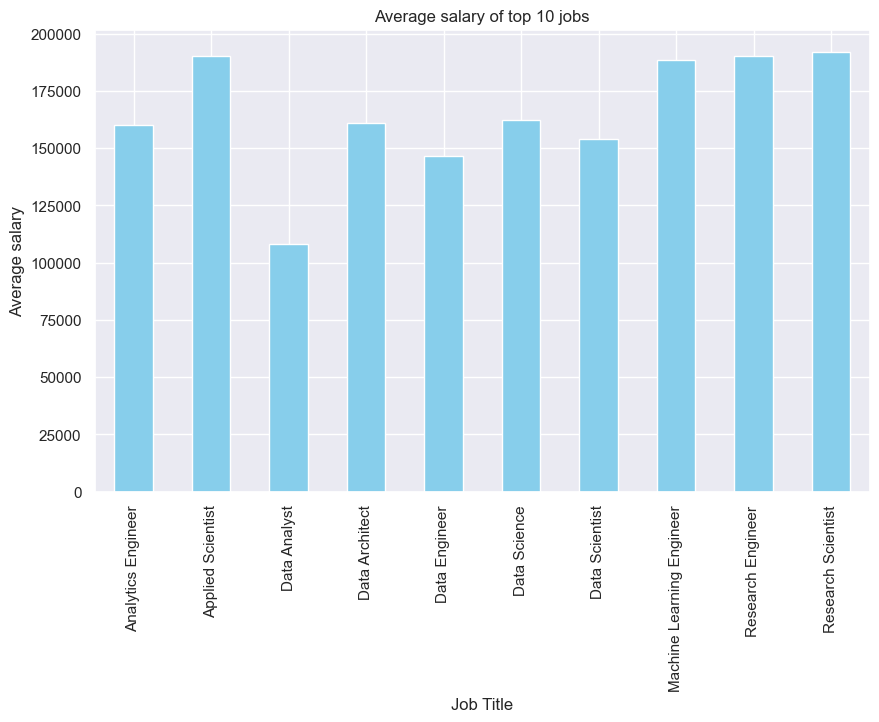

In [36]:
plt.figure(figsize=(10,6))
avg_salary_top_jobs.plot(kind='bar', color='skyblue')
plt.title('Average salary of top 10 jobs')
plt.ylabel('Average salary')
plt.xlabel('Job Title')
plt.show()



In [39]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

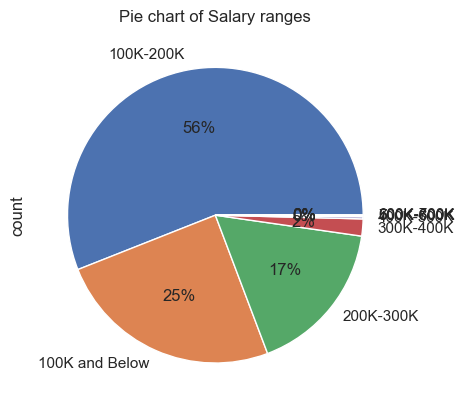

In [51]:

plt.figure()
df['salary_ranges'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Pie chart of Salary ranges")
plt.show()

In [69]:
ml = df[(df["job_title"] == "Machine Learning Engineer") &  (df["employment_type"] == "FT") &  (df["experience_level"] == "SE") &  (df["employee_residence"] == "US")]

In [70]:
ml.head(50)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_ranges
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,100K-200K
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M,100K-200K
62,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,100K-200K
63,2024,SE,FT,Machine Learning Engineer,100000,USD,100000,US,0,US,M,100K and Below
94,2024,SE,FT,Machine Learning Engineer,251250,USD,251250,US,0,US,M,200K-300K
95,2024,SE,FT,Machine Learning Engineer,120750,USD,120750,US,0,US,M,100K-200K
116,2024,SE,FT,Machine Learning Engineer,265000,USD,265000,US,0,US,M,200K-300K
117,2024,SE,FT,Machine Learning Engineer,170000,USD,170000,US,0,US,M,100K-200K
126,2024,SE,FT,Machine Learning Engineer,225000,USD,225000,US,100,US,M,200K-300K
127,2024,SE,FT,Machine Learning Engineer,66000,USD,66000,US,100,US,M,100K and Below


In [76]:
ml_yr = ml.groupby('work_year')['salary_in_usd'].mean().reset_index()


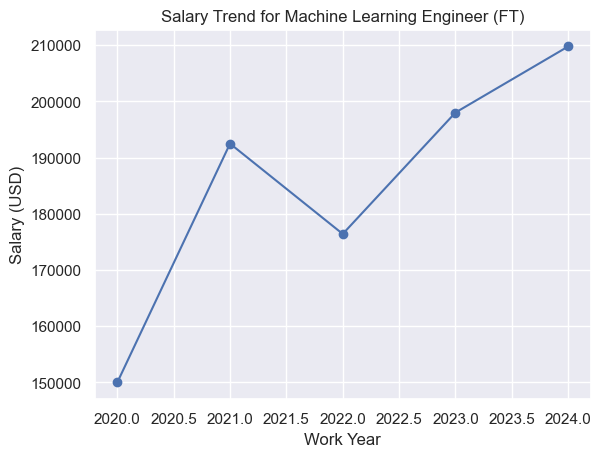

In [78]:
plt.plot(ml_yr['work_year'],ml_yr['salary_in_usd'], marker ='o')
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.title("Salary Trend for Machine Learning Engineer (FT)")
plt.show()